In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(os.path.join('src', 'utils')))

import data_utils

from data_utils import *


In [6]:
sp500=pd.read_csv('data/sp500cik.csv',index_col='date',parse_dates=True)
crsp=pd.read_csv('data/crsp_monthly_correct.csv',index_col='date',parse_dates=True)

Market cap Distribution

In [7]:
#average market capitalization for each company in sp500 during the observation period
market_cap=crsp.groupby(['permno'])['mktcap'].mean()
market_cap.describe()

count    8.390000e+02
mean     2.701826e+10
std      5.693815e+10
min      4.325057e+08
25%      6.113042e+09
50%      1.098712e+10
75%      2.573125e+10
max      8.321630e+11
Name: mktcap, dtype: float64

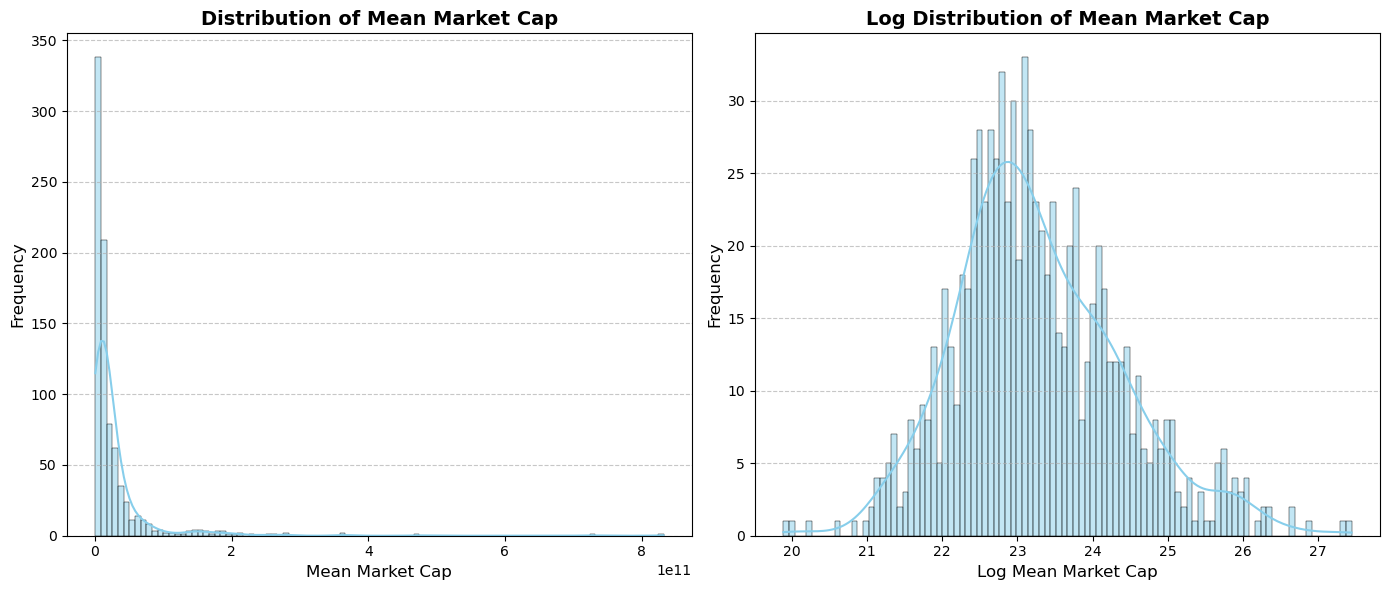

In [8]:
plt.figure(figsize=(14, 6))
# Plot the histogram of mean market cap
plt.subplot(1, 2, 1)
sns.histplot(market_cap, bins=100, color='skyblue', kde=True)
plt.title('Distribution of Mean Market Cap', fontsize=14, fontweight='bold')
plt.xlabel('Mean Market Cap', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the logarithmic histogram of mean market cap
plt.subplot(1, 2, 2)
sns.histplot(np.log(market_cap), bins=100, color='skyblue', kde=True)
plt.title('Log Distribution of Mean Market Cap', fontsize=14, fontweight='bold')
plt.xlabel('Log Mean Market Cap', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

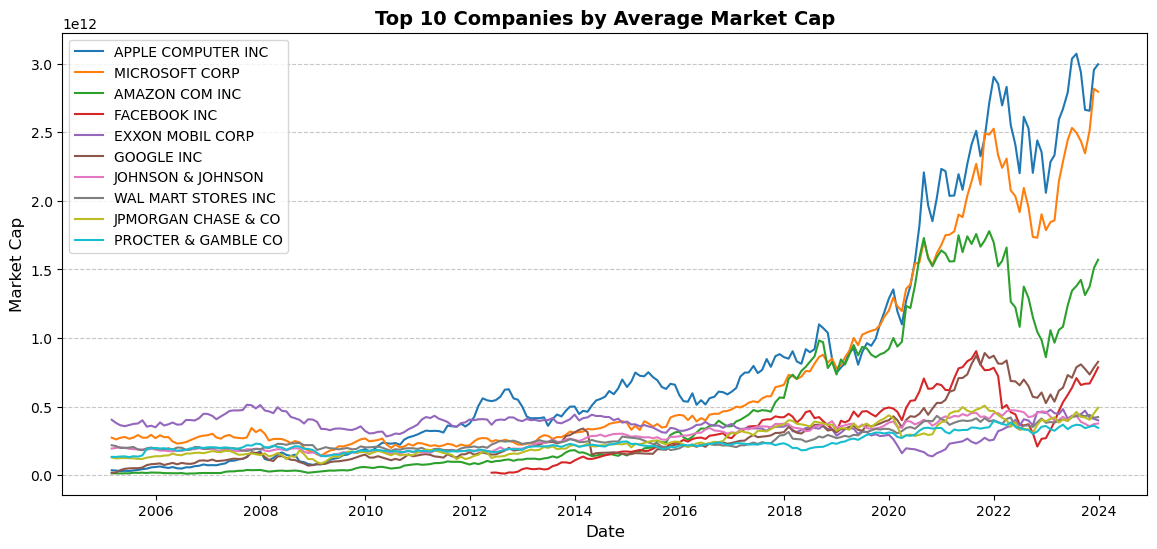

In [9]:
# top20 companies by average market cap
top10_market_cap=market_cap.nlargest(10)
#get company names
top10_company_names=sp500[sp500['permno'].isin(top10_market_cap.index)]['comnam'].unique()
# Plot the evolution in time of the top 10 average market cap
plt.figure(figsize=(14, 6))
for permno in top10_market_cap.index:
    plt.plot(crsp[crsp['permno'] == permno]['mktcap'], label=sp500[sp500['permno'] == permno]['comnam'].values[0])
plt.title('Top 10 Companies by Average Market Cap', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Cap', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()  

In [10]:
N = 10
topN_market_cap = market_cap.nlargest(N)
top_companies = sp500[sp500['permno'].isin(topN_market_cap.index)]
company_periods = {}

for permno, group in top_companies.groupby('permno'):
    comnam = group['comnam'].values[0]  # Get the company name
    start = group['start'].min()       # Get the earliest start date
    ending = group['ending'].max()     # Get the latest end date
    company_periods[comnam] = {'starting': start, 'ending': ending}

# Create the DataFrame
table_data = pd.DataFrame.from_dict(company_periods, orient='index').reset_index()
table_data.columns = ['Company Name', 'Starting', 'Ending']

# Add the "Stable membership" column which is yes if the company is in the S&P500 for the whole period analyzed
table_data['Stable membership'] = table_data.apply(
    lambda row: "yes" if row['Starting'] <= "2009-01-01" and row['Ending'] >= "2020-12-29" else "no",
    axis=1
)

# Print the table
print(table_data.to_string(index=False))


       Company Name   Starting     Ending Stable membership
     MICROSOFT CORP 1994-06-07 2023-12-29               yes
   EXXON MOBIL CORP 1925-12-31 2023-12-29               yes
       FACEBOOK INC 2013-12-23 2023-12-29                no
 APPLE COMPUTER INC 1982-11-18 2023-12-29               yes
PROCTER & GAMBLE CO 1957-03-01 2023-12-29               yes
  JOHNSON & JOHNSON 1973-05-31 2023-12-29               yes
JPMORGAN CHASE & CO 1976-07-01 2023-12-29               yes
WAL MART STORES INC 1982-08-19 2023-12-29               yes
     AMAZON COM INC 2005-11-21 2023-12-29               yes
         GOOGLE INC 2006-04-03 2023-12-29               yes


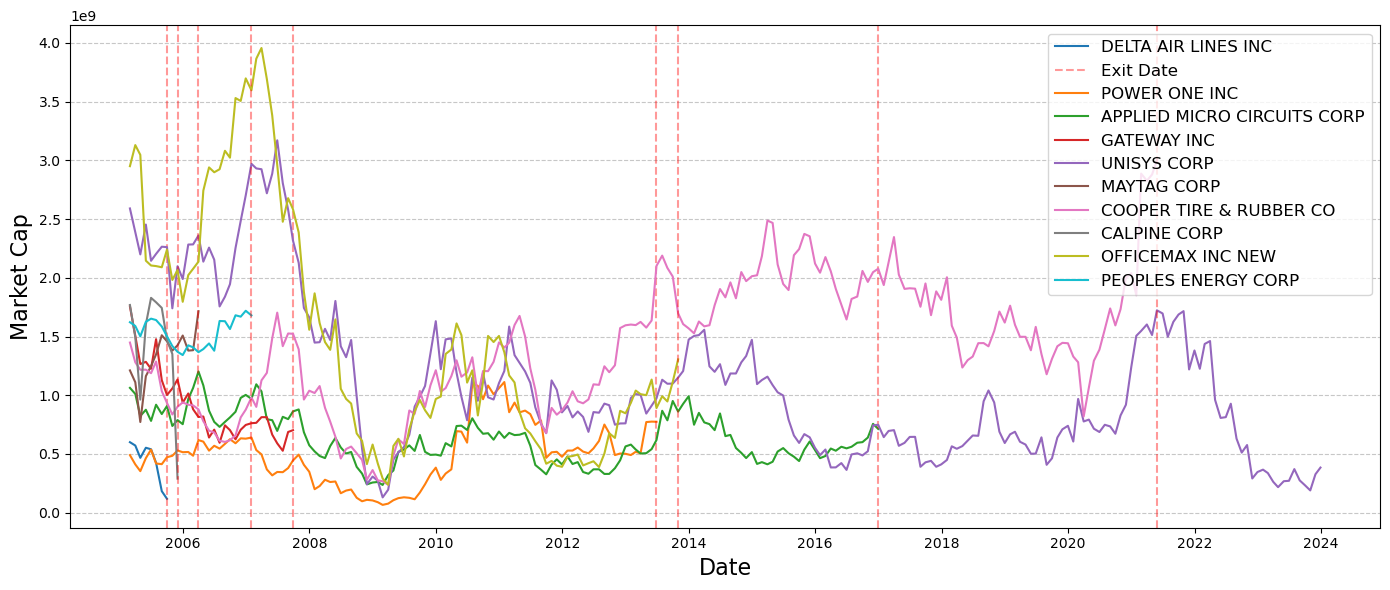

In [11]:
# bottom companies by average market cap
bottom_market_cap=market_cap.nsmallest(10)
#get company names
bottom_company_names=sp500[sp500['permno'].isin(bottom_market_cap.index)]['comnam'].unique()

# Plot the evolution in time of the bottom  companies by average market cap
plt.figure(figsize=(14, 6))

for permno in bottom_market_cap.index:
    # Get the company's data
    company_data = crsp[crsp['permno'] == permno]
    
    # Plot the market cap evolution
    plt.plot(company_data.index, company_data['mktcap'], 
             label=sp500[sp500['permno'] == permno]['comnam'].values[0])
    
    # Add a vertical line if no data exists after the last available date
    last_date = company_data.index.max()
    if last_date and last_date < crsp.index.max():
        plt.axvline(last_date, color='red', linestyle='--', alpha=0.4, 
                    label=f'Exit Date' if permno == bottom_market_cap.index[0] else None)

plt.xlabel('Date', fontsize=16)
plt.ylabel('Market Cap', fontsize=16)
plt.legend(loc='upper right', fontsize=12, ncol=1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
N=20
bottom_N_market_cap=market_cap.nsmallest(N)
bottom_companies = sp500[sp500['permno'].isin(bottom_N_market_cap.index)]
bottom_company_periods = {}

for permno, group in bottom_companies.groupby('permno'):
    comnam = group['comnam'].values[0]  # Get the company name
    start = group['start'].min()       # Get the earliest start date
    ending = group['ending'].max()     # Get the latest end date
    bottom_company_periods[comnam] = {'starting': start, 'ending': ending}


table_data = pd.DataFrame.from_dict(bottom_company_periods, orient='index').reset_index()
table_data.columns = ['Company Name', 'Starting', 'Ending']  

# Print the table 
print(table_data.to_string(index=False))


                Company Name   Starting     Ending
                 UNISYS CORP 1954-04-20 2008-11-10
                   DANA CORP 1957-03-01 2006-03-02
                 MAYTAG CORP 1960-12-14 2006-03-31
         PEOPLES ENERGY CORP 1940-04-15 2007-02-21
             RADIOSHACK CORP 1973-03-01 2011-06-30
         DELTA AIR LINES INC 1968-02-01 2005-08-18
     COOPER TIRE & RUBBER CO 1990-05-25 2006-07-17
       GREAT LAKES CHEM CORP 1991-11-25 2005-07-01
           OFFICEMAX INC NEW 1970-04-23 2008-06-20
               MEREDITH CORP 1968-05-23 2011-01-03
A D C TELECOMMUNICATIONS INC 1999-08-02 2007-06-29
            MANITOWOC CO INC 2007-11-16 2009-08-31
            P M C SIERRA INC 2001-08-03 2007-06-29
            SANMINA SCI CORP 2000-06-21 2007-06-29
                 GATEWAY INC 1998-04-27 2006-07-31
      A K STEEL HOLDING CORP 2008-07-01 2011-12-16
                CALPINE CORP 2000-12-01 2005-12-01
         SCRIPPS E W CO OHIO 2005-12-20 2008-06-30
               POWER ONE INC 20

# Text analysis

In [13]:
text=pd.read_csv('data/embeddings_bert_correct.csv')

In [14]:
# Count words with 2 or more characters in each transcript
text['word_count'] = text['componenttext'].str.count(r'\b\w{2,}\b')
text['word_count'].describe()

count    28780.000000
mean      8536.521716
std       2046.915988
min          3.000000
25%       7463.000000
50%       8594.000000
75%       9563.000000
max      49561.000000
Name: word_count, dtype: float64

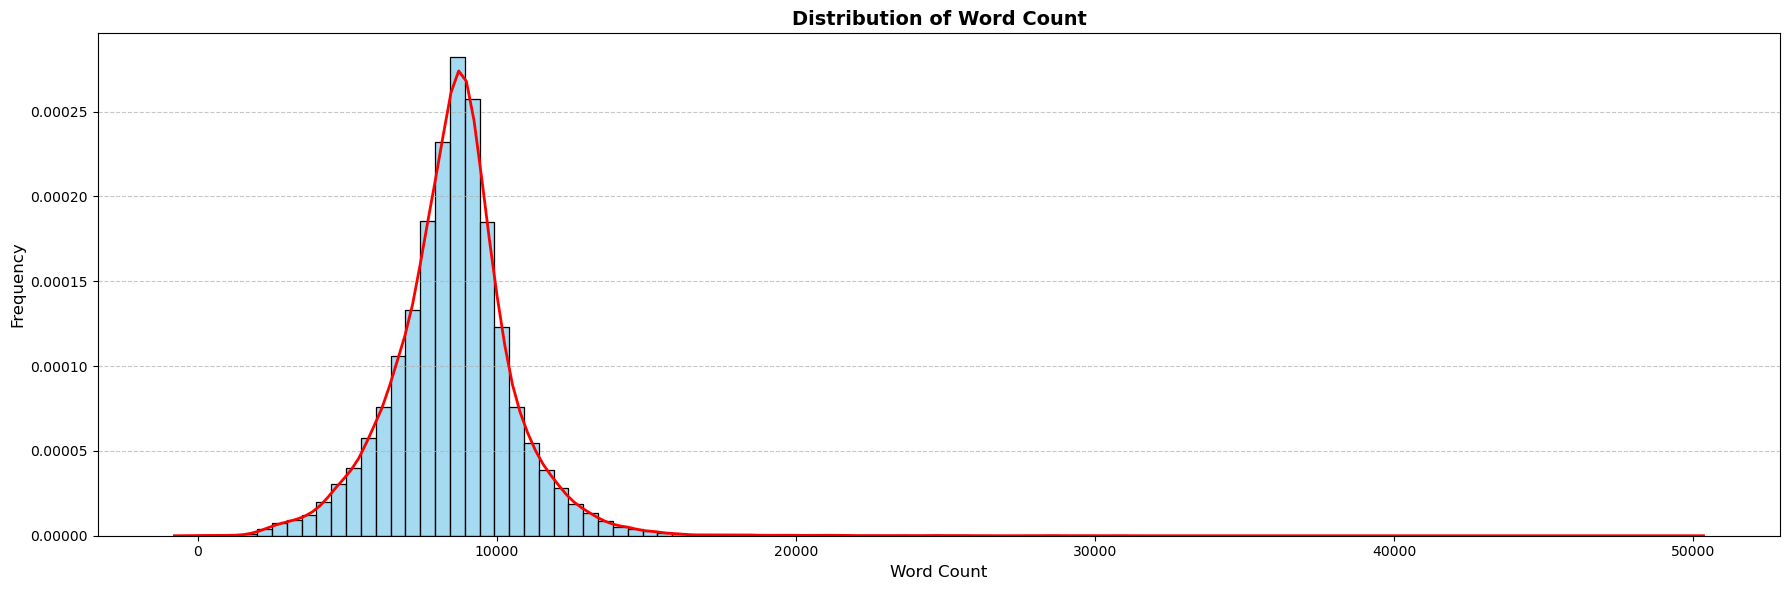

In [15]:
# Assuming `text['word_count']` contains the data
word_counts = text['word_count']

# Set figure size
plt.figure(figsize=(18, 6))

# Plot the histogram of word counts
sns.histplot(word_counts, bins=100, color='skyblue', kde=False, stat='density') 
sns.kdeplot(word_counts, color='red', linewidth=2)
plt.title('Distribution of Word Count', fontsize=14, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


       

Median word count: 8594.00
Percentage of texts with word count over 1.5 times the IQR: 2.36%
Percentage of texts with word count below 1.5 times the IQR: 2.32%
Total percentage outside 1.5 IQR: 4.68%


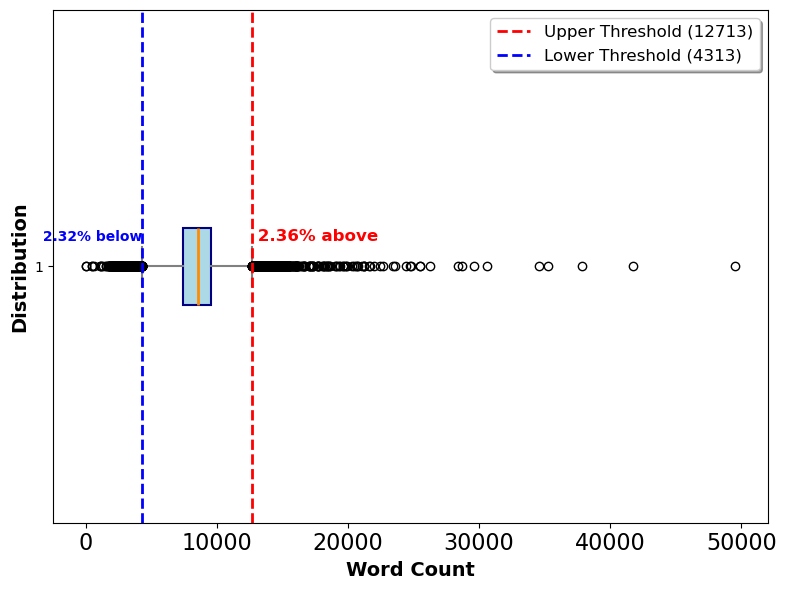

In [16]:
# Compute statistics
median = np.median(word_counts)
q1 = np.percentile(word_counts, 25)
q3 = np.percentile(word_counts, 75)
iqr = q3 - q1

# Calculate thresholds for 1.5 times the IQR
upper_threshold = q3 + 1.5 * iqr
lower_threshold = q1 - 1.5 * iqr

# Calculate percentages above and below 1.5 IQR
over_1_5_iqr = (word_counts > upper_threshold).mean() * 100
below_1_5_iqr = (word_counts < lower_threshold).mean() * 100
outside_percentage = over_1_5_iqr + below_1_5_iqr

# Print statistics
print(f"Median word count: {median :.2f}")
print(f"Percentage of texts with word count over 1.5 times the IQR: {over_1_5_iqr:.2f}%")
print(f"Percentage of texts with word count below 1.5 times the IQR: {below_1_5_iqr:.2f}%")
print(f"Total percentage outside 1.5 IQR: {outside_percentage:.2f}%")


# Create a fancy boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    word_counts, 
    vert=False, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', edgecolor='navy', linewidth=1.5),
    medianprops=dict(color='darkorange', linewidth=2),
    whiskerprops=dict(color='gray', linewidth=1.5),
    capprops=dict(color='gray', linewidth=1.5)
)

# Add lines for 1.5 IQR thresholds
plt.axvline(upper_threshold, color='red', linestyle='--', linewidth=2, label=f'Upper Threshold ({upper_threshold:.0f})')
plt.axvline(lower_threshold, color='blue', linestyle='--', linewidth=2, label=f'Lower Threshold ({lower_threshold:.0f})')

# Annotate percentages directly on the plot
plt.text(
    upper_threshold + 1, 
    1.05, 
    f" {over_1_5_iqr:.2f}% above ", 
    color='red', 
    fontsize=12, 
    ha='left', 
    fontweight='bold'
)
plt.text(
    lower_threshold - 1, 
    1.05, 
    f" {below_1_5_iqr:.2f}% below", 
    color='blue', 
    fontsize=10, 
    ha='right', 
    fontweight='bold'
)

# Add labels, title, and legend
plt.xlabel('Word Count', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Distribution', fontsize=14, fontweight='bold', color='black')

plt.legend(fontsize=12, loc='upper right', frameon=True, fancybox=True, shadow=True)

# Increase the size of the X-axis tick labels
plt.tick_params(axis='x', labelsize=16)

# Show the plot
plt.tight_layout()
plt.show()



# Number of texts

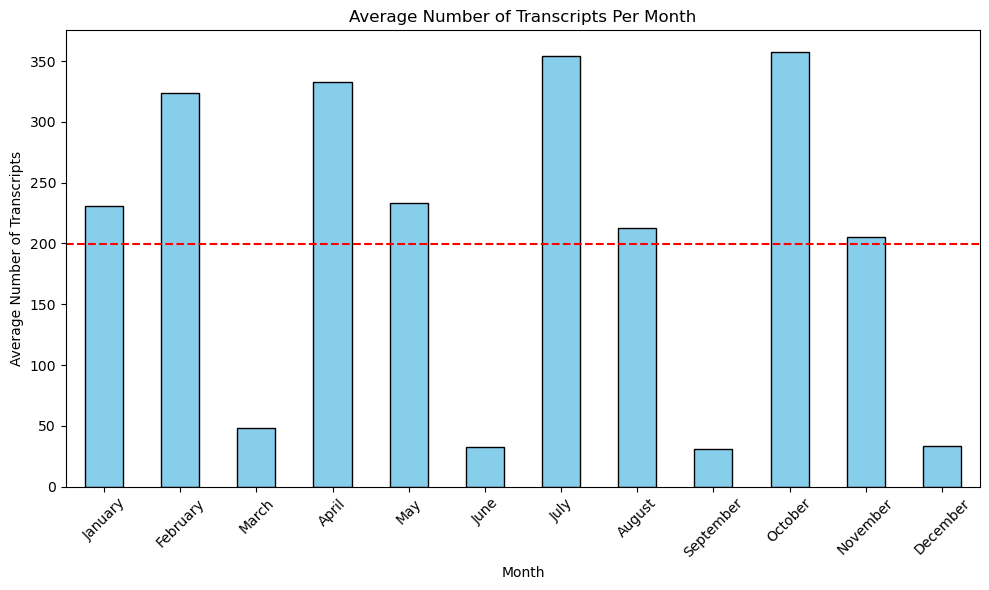

In [17]:
# Group by year and month and count the number of transcripts
monthly_transcripts_counts =text.groupby(['year', 'month'])['transcriptid'].nunique()

# Calculate the average number of unique transcript IDs for each month across all years
average_transcripts_per_month = monthly_transcripts_counts.groupby(level=1).mean()

# Calculate the total average number of transcripts per month
total_average = monthly_transcripts_counts.mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
average_transcripts_per_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add a horizontal line for the total average
plt.axhline(y=total_average, color='red', linestyle='--', label=f'Total Average ({total_average:.2f})')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Average Number of Transcripts')
plt.title('Average Number of Transcripts Per Month')
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)


# Display the plot
plt.tight_layout()
plt.show()

In [18]:
# Count the number of earnings calls for each company
earnings_counts = text.groupby('gvkey')['transcriptid'].nunique()

# Compute the average number of earnings calls per company
average_earnings_calls = earnings_counts.mean()

# Print the results
print(f"Average number of earnings calls per company: {average_earnings_calls:.2f}")

Average number of earnings calls per company: 39.58


In [19]:
text['q&y'] = text.apply(lambda row: f"{row['year']}-Q{get_quarter(row['month'])}", axis=1)

In [20]:
text_sorted = text.sort_values(by='q&y')

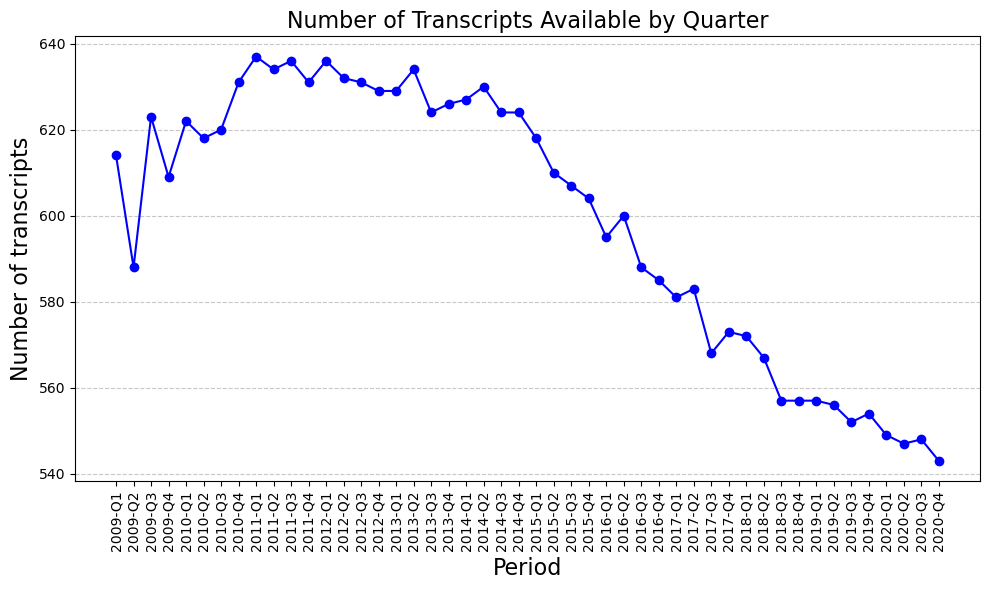

In [21]:
# Group by quarter and count the number of texts
quarterly_text_counts = text_sorted.groupby('q&y')['transcriptid'].count()

# Plot the evolution of the number of texts available for each quarter
plt.figure(figsize=(10, 6))
plt.plot(quarterly_text_counts.index, quarterly_text_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Transcripts Available by Quarter', fontsize=16)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Number of transcripts', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Increase fontsize here
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# EDA OUTPUT VARIABLES


In [22]:
DATA_FOLDER = 'data/'
FRED_MD_DATA = DATA_FOLDER + 'current_month.csv'
fred_df = pd.read_csv(FRED_MD_DATA)
fred_df = apply_tranformations(fred_df, skip_cols={'sasdate'})
fred_df = fred_df.iloc[3:]
fred_df['sasdate'] = pd.to_datetime(fred_df['sasdate'])
fred_df['S&P500 ret'] = fred_df['S&P 500'].pct_change()
fred_df = fred_df.drop(fred_df.index[0])
fred_df = fred_df.reset_index(drop=True)

In [23]:
filtered_output = fred_df[(fred_df['sasdate'] >= '2009-01-01') & (fred_df['sasdate'] <= '2020-12-29')]
#summary statistics of  S&P500 returns
filtered_output['S&P500 ret'].describe()

count    144.000000
mean       0.010666
std        0.035136
min       -0.190681
25%       -0.003434
50%        0.014613
75%        0.030095
max        0.120217
Name: S&P500 ret, dtype: float64

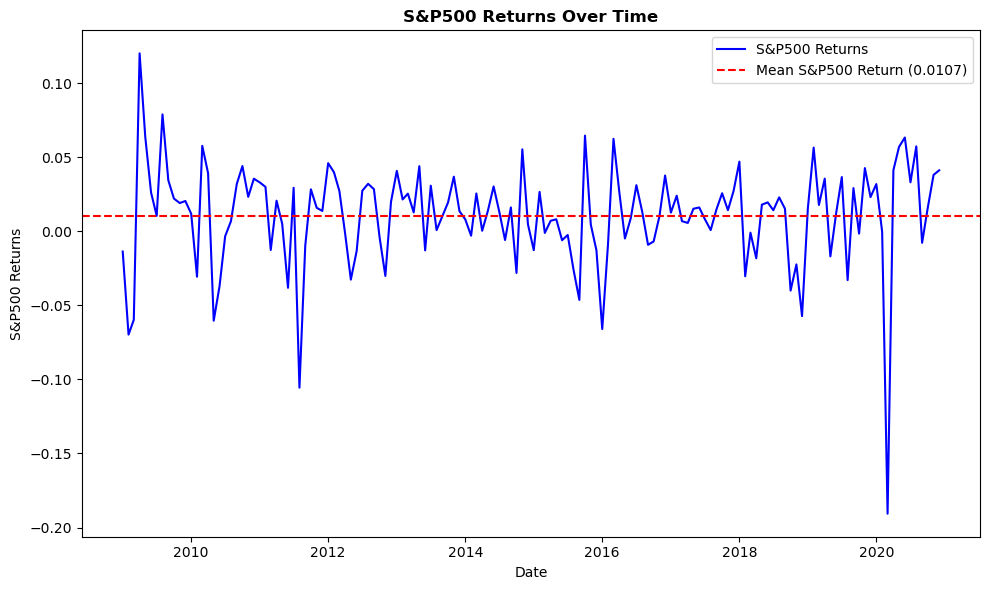

In [24]:
mean_sp500_ret = filtered_output['S&P500 ret'].mean()

# Set figure size
plt.figure(figsize=(10, 6))

# Plot S&P 500 returns
plt.plot(filtered_output['sasdate'], filtered_output['S&P500 ret'], label='S&P500 Returns', color='blue')
plt.axhline(y=mean_sp500_ret, color='red', linestyle='--', label=f'Mean S&P500 Return ({mean_sp500_ret:.4f})')
plt.title('S&P500 Returns Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Date', fontsize=10)
plt.ylabel('S&P500 Returns', fontsize=10)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


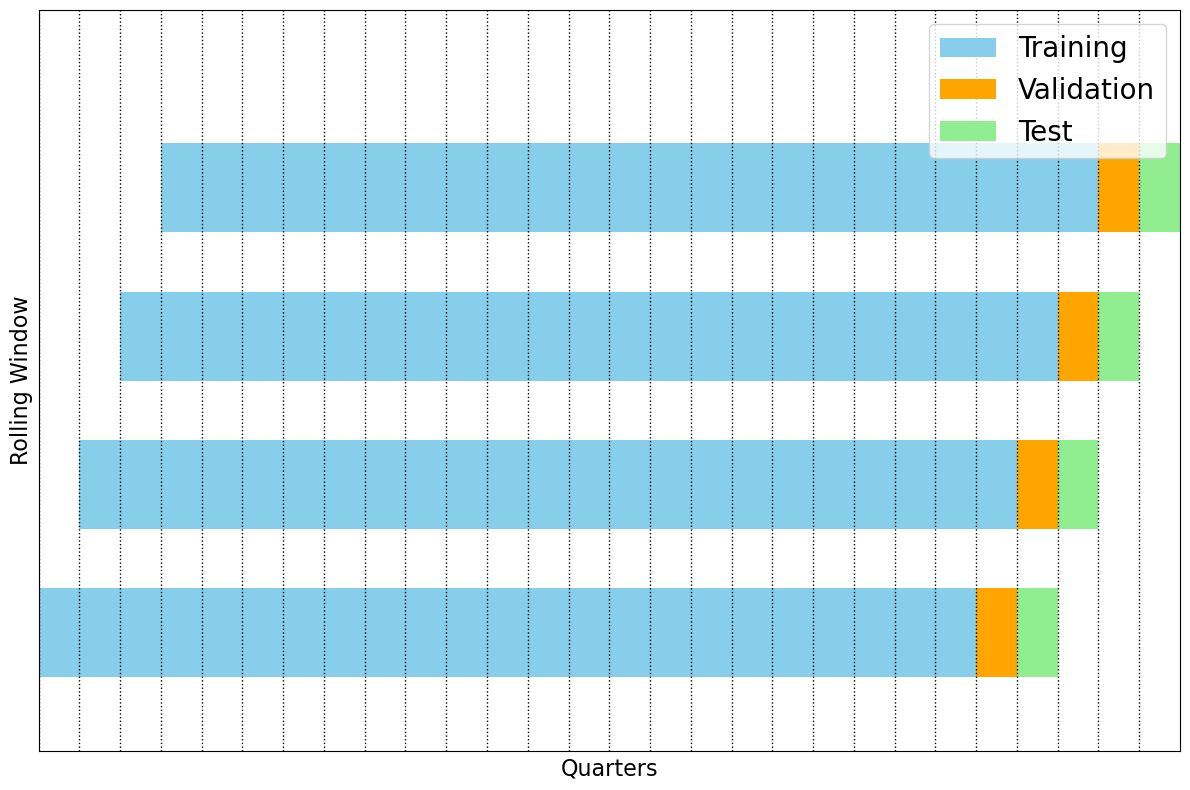

In [25]:
# Problem parameters
total_quarters = 28  # From 2009-Q1 to 2015-Q4 there are 28 quarters
train_quarters = 23  # Training set: 5 years and 3 quarters
validation_quarters = 1  # Validation set: 1 quarter
test_quarters = 1  # Test set: 1 quarter

# Create a list of quarters from 2009-Q1 to 2015-Q4
quarters = [f"{year}-Q{q}" for year in range(2009, 2016) for q in range(1, 5)][:total_quarters]

# Lists for storing windows
training_windows = []
validation_windows = []
test_windows = []

# Rolling window: each window advances by 1 quarter
for start in range(total_quarters - train_quarters - validation_quarters - test_quarters + 1):
    training_start = start
    training_end = start + train_quarters
    validation_start = training_end
    validation_end = validation_start + validation_quarters
    test_start = validation_end
    test_end = test_start + test_quarters

    training_windows.append((training_start, training_end))
    validation_windows.append((validation_start, validation_end))
    test_windows.append((test_start, test_end))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for Training, Validation, and Test sets
for i, ((tr_start, tr_end), (val_start, val_end), (test_start, test_end)) in enumerate(
    zip(training_windows, validation_windows, test_windows)
):
    ax.broken_barh([(tr_start, tr_end - tr_start)], (10 * i, 6), facecolors='skyblue', label="Training" if i == 0 else "")
    ax.broken_barh([(val_start, val_end - val_start)], (10 * i, 6), facecolors='orange', label="Validation" if i == 0 else "")
    ax.broken_barh([(test_start, test_end - test_start)], (10 * i, 6), facecolors='lightgreen', label="Test" if i == 0 else "")

# Axis settings
ax.set_ylim(-5, len(training_windows) * 10 + 5)  # Adjust y-axis limits
ax.set_xlim(0, total_quarters)  # Set x-axis limits
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Position y-ticks for windows


ax.set_xlabel("Quarters", fontsize=16)  # Increase font size of X-axis label
ax.set_ylabel("Rolling Window", fontsize=16)  # Increase font size of Y-axis label


# Add vertical lines for each quarter
for i in range(total_quarters):
    ax.axvline(x=i, color='black', linestyle=':', linewidth=1)

# Add legend with larger font and position it on the left
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Avoid duplicate labels
ax.legend(by_label.values(), by_label.keys(), fontsize=20, loc='upper right', bbox_to_anchor=(1, 1))  # Legend on the left

# Show the plot
plt.tight_layout()
plt.grid(True)  # Add grid
plt.show()




